In [1]:
%run ./py_templates/1_Boilerplate_numeric.py

Author        : sm626967
Python        : 3.7.4 
NumPy         : 1.18.1
Encoding      : utf-8
Timestamp     : 1589405501.9373975


# Solving Instrumentation Amplifiers

Use the following schematic for reference:

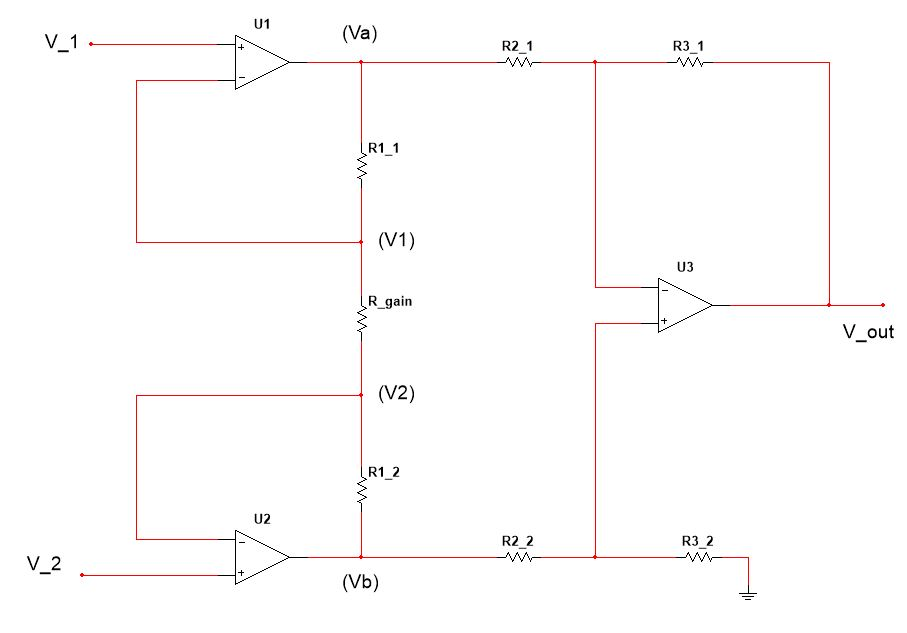

The following relationships apply:<br><br>
$$\frac{V_a-V_1}{R1_1}=\frac{V_1-V_2}{R_{gain}}$$<br><br>
$$\frac{V_1-V_2}{R_{gain}}=\frac{V_2-V_b}{R1_2}$$<br><br>

Normally, $R1_1$ and $R1_2$ are just listed as $R_1$ and have the same value, in the same way that $R2_1$ and $R2_2$ are just listed as $R_2$ and $R3_1$ and $R3_2$ are just listed as $R_3$.  Sometimes, all these resistors will just be labeled $R$ and all have the same value and tolerance.  The above schematic was generated in the MultiSim nelister tool and duplicate reference designators are disallowed. 

Suppose you wanted to know what $V_a$ was.  You knew what $V_1$ and $V_2$ are, and you knew the resistor values...

Solve the top equation in terms of $V_a$...<br><br>
$$V_a=\frac{V_1R_1-V_2R_1+V_1R_{gain}}{R_{gain}}$$
<br><br>
Solve the lower equation in terms of $V_b$...<br><br>
$$V_b=\frac{V_1R_1-V_2R_1-V_2R_{gain}}{R_{gain}}\cdot-1$$

Let's take the example from the lab and set the following:

In [2]:
V1=1.65
V2=2.25
R1=47.0E3
Rgain=50.0E3+4.7E3
VA=(V1*R1-V2*R1+V1*Rgain)/Rgain
VB=((V1*R1-V2*R1-V2*Rgain)/Rgain)*-1
print("VA:",'{0:.5f}'.format(VA),"Volts")
print("VB:",'{0:.5f}'.format(VB),"Volts")

VA: 1.13446 Volts
VB: 2.76554 Volts


Knowing these two values, we can easily find anything we like now ... 

Let's vind the value across $R_{gain}$ ... remember that there is a gain limit resistor in our lab that is in series with $R_{gain}\enspace$ itself.

We know that the output at $V_A$ is 1.13446V, and that the node at (V1) must be the same as $V_1$ so the voltage across this resistor is the difference.

In [3]:
VR1_1=VA-V1
print("VR1_1:",'{0:.5f}'.format(VR1_1),"Volts")

VR1_1: -0.51554 Volts


Meaning that as we move from point VA <b>TO</b> (V1) we have to increase in voltage.  If we went from (V1) to VA, we would have to decrease in voltage.

Let's look at the ouput at VB and the resistor connected to (V2)...

In [4]:
VR1_2=VB-V2
print("VR1_2:",'{0:.5f}'.format(VR1_2),"Volts")

VR1_2: 0.51554 Volts


Meaning that as we move from point VB <b>TO</b> (V2) we have to decrease in voltage.  If we went from (V2) to VB, we would have to increase in voltage.

Between (V1) and (V2) there is the difference between $V_1$ and $V_2$ or ...

In [5]:
Vgain=V2-V1
print("Vgain:",'{0:.5f}'.format(Vgain),"Volts")

Vgain: 0.60000 Volts


This means by ohms law it's easy to calculate the voltage drops across Rgain...

In [6]:
Igain=Vgain/Rgain
print("Igain:",'{0:.5e}'.format(Igain),"Amperes")

Igain: 1.09689e-05 Amperes


The voltage on VB was $$V_b=\frac{V_1R_1-V_2R_1-V_2R_{gain}}{R_{gain}}\cdot-1$$ and this value is divided equally by $R2_2$ and $R3_2$

Which means that the voltage found at the noninverting input of <b>U3</b> is half of VB ...

$V_{OUT}\enspace$ is found by the following relationship:

$$V_{out}=\frac{R3_1}{R2_1} \cdot (V_b-V_a)$$

In [7]:
R3_1=47.0E3
R2_1=47.0E3
VOUT=R3_1/R2_1*(VB-VA)
print("VOUT:",'{0:.5f}'.format(VOUT),"Volts")

VOUT: 1.63108 Volts


The standard way that the ouput of an instrumentation amplifier is calculated is using the following formula:<br><br> $$V_{out}=\frac{R3_1}{R2_1} \cdot \left( 1+\frac{2R_1}{R_{gain}}\enspace \right) \cdot (V_2-V_1)$$

In [8]:
R3_1=47.0E3
R2_1=47.0E3
R1=47.0E3
Rgain=4.7E3+50E3
V2=2.25
V1=1.65
VOUT_alt=(R3_1/R2_1)*(1+(2*R1/Rgain))*(V2-V1)
print("VOUT:",'{0:.5f}'.format(VOUT_alt),"Volts")

VOUT: 1.63108 Volts


... Which agrees with the first method. 